# Palettes
1. matplotlib

In [1]:
# Standard Libs
import random
import datetime
from typing import Union, Optional, Any, Literal, Sequence, TypeAlias

# Third-party Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Custom types for non-included typing annotations
IndexElement: TypeAlias = Union[str, int, float, pd.Timestamp]

In [2]:
# Data
dic = {str(i): 1 for i in range(20)}
sr0 = pd.Series(dic)
# sr

# d2 = {str(i): 1 + i * 0.01 for i in range(20)}
# s2 = pd.Series(d2)
# s2

In [3]:
def to_series(
    data: Union[pd.Series, np.ndarray, dict, list, set, pd.DataFrame],
    index: Optional[Union[pd.Index, Sequence[IndexElement]]] = None,
    name: Optional[str] = None
) -> pd.Series:
    """
    Converts input data into a pandas Series with optional custom index and name.

    This function standardizes various data types into a pandas Series. It supports
    arrays, dictionaries, lists, sets, DataFrames, and existing Series. Optionally,
    a custom index or series name can be assigned.

    Parameters:
        data (Union[pd.Series, np.ndarray, dict, list, set, pd.DataFrame]):
            Input data to convert. Supported types:
            - pd.Series: returned as-is (can be overridden with new index/name).
            - np.ndarray: flattened and converted to a Series.
            - dict: keys become the index, values become the data.
            - list or set: converted to a Series with default integer index.
            - pd.DataFrame:
                - 1 column: converted directly to a Series.
                - 2 columns: first column becomes the index, second becomes the values.
        index (Union[pd.Index, Sequence], optional): Custom index to assign to the Series.
            If provided, overrides the original index. Default is None.
        name (str, optional): Name to assign to the Series. Default is None.

    Returns:
        pd.Series: A pandas Series constructed from the input data, with optional
            custom index and name.

    Raises:
        TypeError: If the input data type is not supported.
        ValueError: If the DataFrame has more than 2 columns.

    Examples:
        >>> import pandas as pd
        >>> to_series([1, 2, 3, 4])
        0    1
        1    2
        2    3
        3    4
        dtype: int64

        >>> to_series({'A': 10, 'B': 20, 'C': 30})
        A    10
        B    20
        C    30
        dtype: int64

        >>> df = pd.DataFrame({'Label': ['X', 'Y'], 'Value': [100, 200]})
        >>> to_series(df)
        Label
        X    100
        Y    200
        Name: Value, dtype: int64

        >>> to_series([10, 20, 30], index=['a', 'b', 'c'], name='Measurements')
        a    10
        b    20
        c    30
        Name: Measurements, dtype: int64
    """
    
    # Validate parameters - FUTURE
    
    if isinstance(data, pd.Series):                 # If series is already a Series no conversion needed
        series = data                                  
    elif isinstance(data, np.ndarray):              # If data is a NumPy array   
        series = pd.Series(data.flatten())
    elif isinstance(data, (dict, list)):
        series = pd.Series(data)
    elif isinstance(data, (set)):
        series = pd.Series(list(data))
    elif isinstance(data, pd.DataFrame):
        if data.shape[1] == 1:                      # Also len(data.columns == 1)
            series = data.iloc[:, 0]
        elif data.shape[1] == 2:                    # Index: first col, Data: 2nd Col
            series = data.set_index(data.columns[0])[data.columns[1]]
        else:
            raise ValueError("DataFrame must have 1 oer 2 columns. Categories and values for 2 columns cases.")
    else:
        raise TypeError(f"Unsupported data type: {type(data)}. "
                    "Supported types: pd.Series, np.ndarray, pd.DataFrame, dict, list, set, and pd.DataFrame")

    if name:
        series.name = name

    if index:
        series.index = index

    return series

In [4]:
def get_colorblind_palette_list():
    """
    Retorna una lista de colores (hexadecimales) amigables para personas
    con daltonismo, equivalentes a sns.color_palette('colorblind').
    """
    return [
        '#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC',
        '#CA9161', '#FBAFE4', '#949494', '#ECE133', '#56B4E9',
        '#5D8C3B', '#A93967', '#888888', '#FFC107', '#7C9680',
        '#E377C2', '#BCBD22', '#AEC7E8', '#FFBB78', '#98DF8A',
        '#FF9896', '#C5B0D5', '#C49C94', '#F7B6D2', '#DBDB8D',
        '#9EDAE5', '#D68E3A', '#A65898', '#B2707D', '#8E6C87'
    ]


def get_colors_list(palette: str, n_items: Optional[int] = 10) -> list[str]:
    """
    Return a valid matplotlib palette list 
    - 'colorblind' is a kind of sns.colorblind 
    - Quali (Cat) = ['tab10', 'tab20', 'Set1', 'Set2', 'Set3', 'Pastel1', 'Pastel2', 'Dark2', 'Paired', 'Accent', 'colorblind']
    - Sequen (Order) = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds']
    - Diverg (MidPoint) = ['coolwarm', 'bwr', 'seismic', 'PiYG', 'PRGn', 'BrBG', 'RdGy', 'RdBu', 'Spectral', 'RdYlGn', 'PuOr', 'RdYlBu']
    - Cyclic (Repeat)= ['twilight', 'twilight_shifted', 'hsv', 'turbo', 'cubehelix', 'gist_rainbow', 'jet', 'nipy_spectral', 'rainbow_r']
    - Mix = ['rainbow', 'flag', 'prism', 'ocean', 'terrain', 'gnuplot', 'CMRmap', 'hot', 'afmhot', 'gist_heat', 'copper', 'bone', 'pink']
    """
    if palette == 'colorblind':
        color_list = get_colorblind_palette_list()
    else:
        cmap = plt.get_cmap(palette, n_items)             # Use palette colormap
        color_list = [cmap(i) for i in range(n_items)]    # Get colors from the colormap

    return color_list

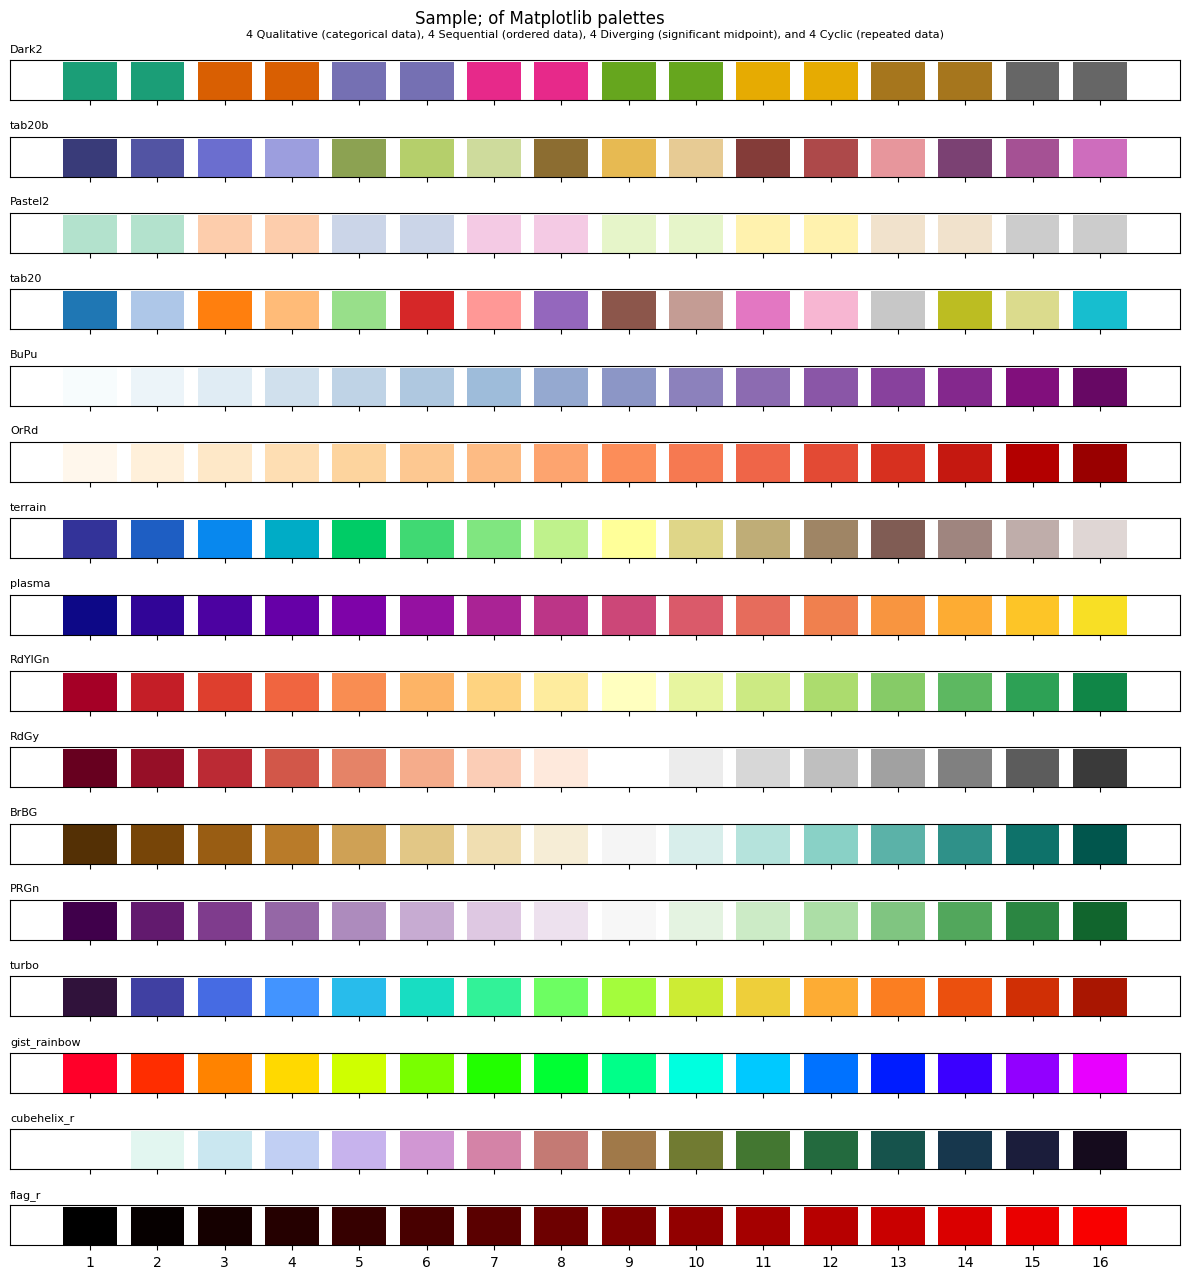

<Figure size 640x480 with 0 Axes>

In [ ]:
# TO-DO, a try/except para prevenir nombres de paletas no válidos       - DONE
#    - Además, adicionar un p_g_key ('sample') para que presente una muestra de maso tres o cuatro paletas de cada grupo - DONE


def show_plt_palettes(palette_group_key: str='Sample', n_items: int=15) -> plt.Figure:
    """
    Displays a visual sample of Matplotlib color palettes grouped by category.

    This function creates a vertical subplot for each palette in a selected group,
    showing how colors are distributed across a bar chart. It supports four main
    Matplotlib palette categories: Qualitative, Sequential, Diverging, and Cyclic.
    If no specific group is provided, it displays a representative sample of all groups.

    Parameters:
        palette_group_key (str, optional): Name of the palette group to display. Valid options:
            - 'Qualitative': for categorical data.
            - 'Sequential': for ordered or monotonic data.
            - 'Diverging': for data with a meaningful midpoint.
            - 'Cyclic': for periodic data (e.g., angles, phases).
            - 'Sample' (default): shows a mixed sample of 4 palettes from each group.

            The input is case-insensitive and automatically capitalized.

        n_items (int, optional): Number of color items (bars) to display per palette.
            Must be between 1 and 25 (inclusive). Default is 15.

    Returns:
        matplotlib.figure.Figure: The generated figure object containing all subplots.
            This allows further customization or saving after display.

    Raises:
        ValueError: If `n_items` is not in the valid range (1–25).

    Notes:
        - Invalid or deprecated Matplotlib colormaps are handled gracefully and labeled accordingly.
        - The function uses `get_colors_list` internally to extract colors from each palette.
        - Useful for exploring and selecting appropriate color schemes for data visualization.

    Example:
        >>> show_plt_palettes('Sequential', n_items=10)
        # Displays 10-color bars for all Sequential palettes.

        >>> show_plt_palettes()
        # Shows a default sample of 4 palettes from each category.
    """
    
    # Verified n_times parameter
    if isinstance(n_items, (int, float)) and (n_items > 0 or n_items < 25):
        n_items = int(n_items) + 1
    else:
        n_items = 16

    # Palette_group selection
    palette_group_key = palette_group_key.strip().capitalize() 
    
    # 1. Palette Group lists
    Qualitative = ['Accent', 'colorblind', 'Dark2', 'Dark2_r', 'flag', 'Paired', 'Pastel1', 'Pastel2',
                    'prism', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']

    Sequential = ['autumn', 'binary', 'Blues', 'brg', 'BuPu', 'cividis', 'cool', 'GnBu',
            #   'Greens', 'Greys', 'Greys_r', 'gnuplot', 'inferno', 'magma', 'ocean', 'Oranges',
                'OrRd', 'plasma', 'PuRd', 'Purples', 'Reds', 'terrain', 'viridis', 'Wistia']

    Diverging = ['BrBG', 'bwr', 'bwr_r', 'coolwarm', 'PiYG', 'PiYG_r', 'PRGn', 'PRGn_r',
                 'PuOr', 'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'seismic', 'Spectral', 'Spectral_r']

    Cyclic = ['berlin', 'berlin_r', 'cubehelix', 'cubehelix_r', 'flag_r', 'gist_rainbow', 'hsv', 'managua',
              'nipy_spectral', 'rainbow', 'rainbow_r', 'twilight', 'twilight_shifted', 'turbo', 'vanimo']

    # 2. Get the palette group (and _desc) based on the input string (the one selected by the user)
    palette_group_dic = {
        'Qualitative': (Qualitative, 'for categorical data'),
        'Sequential': (Sequential, 'for data that has an order'),
        'Diverging': (Diverging, 'for data that have a significant midpoint'),
        'Cyclic': (Cyclic, 'for data that repeats, such as angles or phases'),
    }

    defaults_for_sample = ('Sample', 'of Matplotlib palettes')
    palette_group = palette_group_dic.get(palette_group_key, defaults_for_sample)[0]         # Get the list of palettes for the selected group
    palette_group_desc = palette_group_dic.get(palette_group_key, defaults_for_sample)[1]    # Get the description for the selected group

    # Build a Series of n_items elements to show colors
    sr = to_series({str(i): 1 for i in range(1, n_items)})
    
    # Build the bar chart showing palette colors
    if palette_group == 'Sample':
        palette_group_key = palette_group        # Special case of sample of three from each group
        palette_group = [palette for p_g in [Qualitative, Sequential, Diverging, Cyclic] for palette in random.sample(p_g, k=4)]

    # Build the fig and subplots
    fig, axs = plt.subplots(len(palette_group), 1, figsize=(12, len(palette_group)/1.25), tight_layout=True, sharex=True)
    fig.text(0.35, 0.985, f"{palette_group_key}; {palette_group_desc}", fontsize=12, fontweight='medium')

    if palette_group_key == 'Sample':
        fig.suptitle(f"4 Qualitative (categorical data), 4 Sequential (ordered data), 4 Diverging (significant midpoint)\
, and 4 Cyclic (repeated data)", fontsize=8)
#     fig.text(0, 0, "For more details about a specific palette group, select 'Qualitative', 'Sequential', 'Diverging'\
# , or 'Cyclic' in the palette_group_str parameter.", fontsize=8)
                                                
    for ax, pltt in zip(axs, palette_group):
        try:
            color_list = get_colors_list(pltt, n_items=n_items)
            ax.bar(sr.index, sr, color=color_list)
        except ValueError:
            pltt = f"'{pltt}' is not currently a valid Matplotlib palette (cmap)"
        finally:
            ax.set_title(pltt, loc='left', fontsize=8, fontweight='medium')
            ax.set_yticks([])       # Hide y-ticks for cleaner look

    plt.show()
    return plt.gcf()                # Return the current figure for further manipulation if needed


fig = show_plt_palettes(palette_group_key='Quale', n_items=16)

In [6]:
palette_group = ['berlin', 'flag_r', 'hsv', 'casa']
# color_lists = [get_colors_list(pltt, n_items=10) for pltt in palette_group]

# for color_list in color_lists:
#     print(color_list)

for pltt in palette_group:
    try:
        color_list = get_colors_list(pltt, n_items=9)
        print(pltt)
    except ValueError:
        pass

berlin
flag_r
hsv


In [7]:
palette_group_key = 'casa'

# Palette_group selection: 1. Palette Group lists
Qualitative = ['Accent', 'colorblind', 'Dark2', 'Dark2_r', 'flag', 'Paired', 'Pastel1', 'Pastel2',
                'prism', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']

Sequential = ['autumn', 'binary', 'Blues', 'brg', 'BuPu', 'cividis', 'cool', 'GnBu',
            'Greens', 'Greys', 'Greys_r', 'gnuplot', 'inferno', 'magma', 'ocean', 'Oranges',
            'OrRd', 'plasma', 'PuRd', 'Purples', 'Reds', 'terrain', 'viridis', 'Wistia']

Diverging = ['BrBG', 'bwr', 'bwr_r', 'coolwarm', 'PiYG', 'PiYG_r', 'PRGn', 'PRGn_r',
                'PuOr', 'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'seismic', 'Spectral', 'Spectral_r']

Cyclic = ['berlin', 'colorwheel', 'cubehelix', 'cubehelix_r', 'flag_r', 'gist_rainbow', 'hsv', 'managua',
            'nipy_spectral', 'rainbow', 'rainbow_r', 'twilight', 'twilight_shifted', 'turbo', 'vanimo']

# Get the palette group based on the input string (the one selected by the user)
palette_group_dic = {
    'Qualitative': (Qualitative, 'for categorical data'),
    'Sequential': (Sequential, 'for data that has an order'),
    'Diverging': (Diverging, 'for data that have a significant midpoint'),
    'Cyclic': (Cyclic, 'for data that repeats, such as angles or phases'),
}

defaults_for_sample = ('Sample', 'of Matplotlib palettes')
palette_group = palette_group_dic.get(palette_group_key, defaults_for_sample)[0]         # Get the list of palettes for the selected group
palette_group_desc = palette_group_dic.get(palette_group_key, defaults_for_sample)[1]    # Get the description for the selected group

print(f"{palette_group = }")
print(f"{palette_group_desc = }")

# palette_group = []
# for p_g in [Qualitative, Sequential, Diverging, Cyclic]:
#     palette_group.append(random.choices(p_g, k=3))
# # print(palette_group)
# palette_group

palette_group = [palette for p_g in [Qualitative, Sequential, Diverging, Cyclic] for palette in random.choices(p_g, k=3)]
print(palette_group)

palette_group = 'Sample'
palette_group_desc = 'of Matplotlib palettes'
['tab20c', 'Set1', 'tab10', 'cividis', 'cool', 'Reds', 'coolwarm', 'PiYG', 'PuOr', 'rainbow', 'hsv', 'vanimo']


In [8]:
from matplotlib import colormaps
## Real plt palettes
Qualitatives = [
    'tab10', 'tab20', 'Set1', 'Set2', 'Set3', 'Pastel1', 'Pastel2', 'Dark2', 'Paired', 'Accent',
    'D3', 'Vega10', 'Vega20', 'Vega20b', 'Vega20c', 'Tableau10', 'Tableau20', 'Category10', 'Bold', 'Light',
    'flag', 'prism'
]

Sequential = [
    'viridis', 'plasma', 'inferno', 'magma', 'cividis',
    'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd',
    'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn',
    'ocean', 'gist_earth', 'terrain', 'gnuplot', 'gnuplot2', 'CMRmap', 'hot', 'afmhot', 'gist_heat', 'copper', 'bone', 'pink'
]

Diverging = [
    'coolwarm', 'bwr', 'seismic', 'PiYG', 'PRGn',
    'BrBG', 'RdGy', 'RdBu', 'Spectral', 'RdYlGn', 'PuOr', 'RdYlBu'
]

Cyclic = [
    'twilight', 'twilight_shifted', 'hsv',
    'colorwheel', 'turbo', 'gist_rainbow', 'jet', 'nipy_spectral', 'rainbow_r',
    'rainbow', 'cubehelix', 'cubehelix_r'
]


cmaps = list(colormaps)

print([cmap for cmap in cmaps if cmap not in Sequential + Diverging + Cyclic + Qualitatives])  # Exclude known palettes


['berlin', 'managua', 'vanimo', 'Wistia', 'autumn', 'binary', 'brg', 'cool', 'gist_gray', 'gist_ncar', 'gist_stern', 'gist_yarg', 'gray', 'spring', 'summer', 'winter', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'berlin_r', 'managua_r', 'vanimo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'Greens_r', 'Greys_r', 'OrRd_r', 'Oranges_r', 'PRGn_r', 'PiYG_r', 'PuBu_r', 'PuBuGn_r', 'PuOr_r', 'PuRd_r', 'Purples_r', 'RdBu_r', 'RdGy_r', 'RdPu_r', 'RdYlBu_r', 'RdYlGn_r', 'Reds_r', 'Spectral_r', 'Wistia_r', 'YlGn_r', 'YlGnBu_r', 'YlOrBr_r', 'YlOrRd_r', 'afmhot_r', 'autumn_r', 'binary_r', 'bone_r', 'brg_r', 'bwr_r', 'cool_r', 'coolwarm_r', 'copper_r', 'flag_r', 'gist_earth_r', 'gist_gray_r', 'gist_heat_r', 'gist_ncar_r', 'gist_rainbow_r', 'gist_stern_r', 'gist_yarg_r', 'gnuplot_r', 'gnuplot2_r', 'gray_r', 'hot_r', 'hsv_r', 'jet_r', 'nipy_spectral_r', 

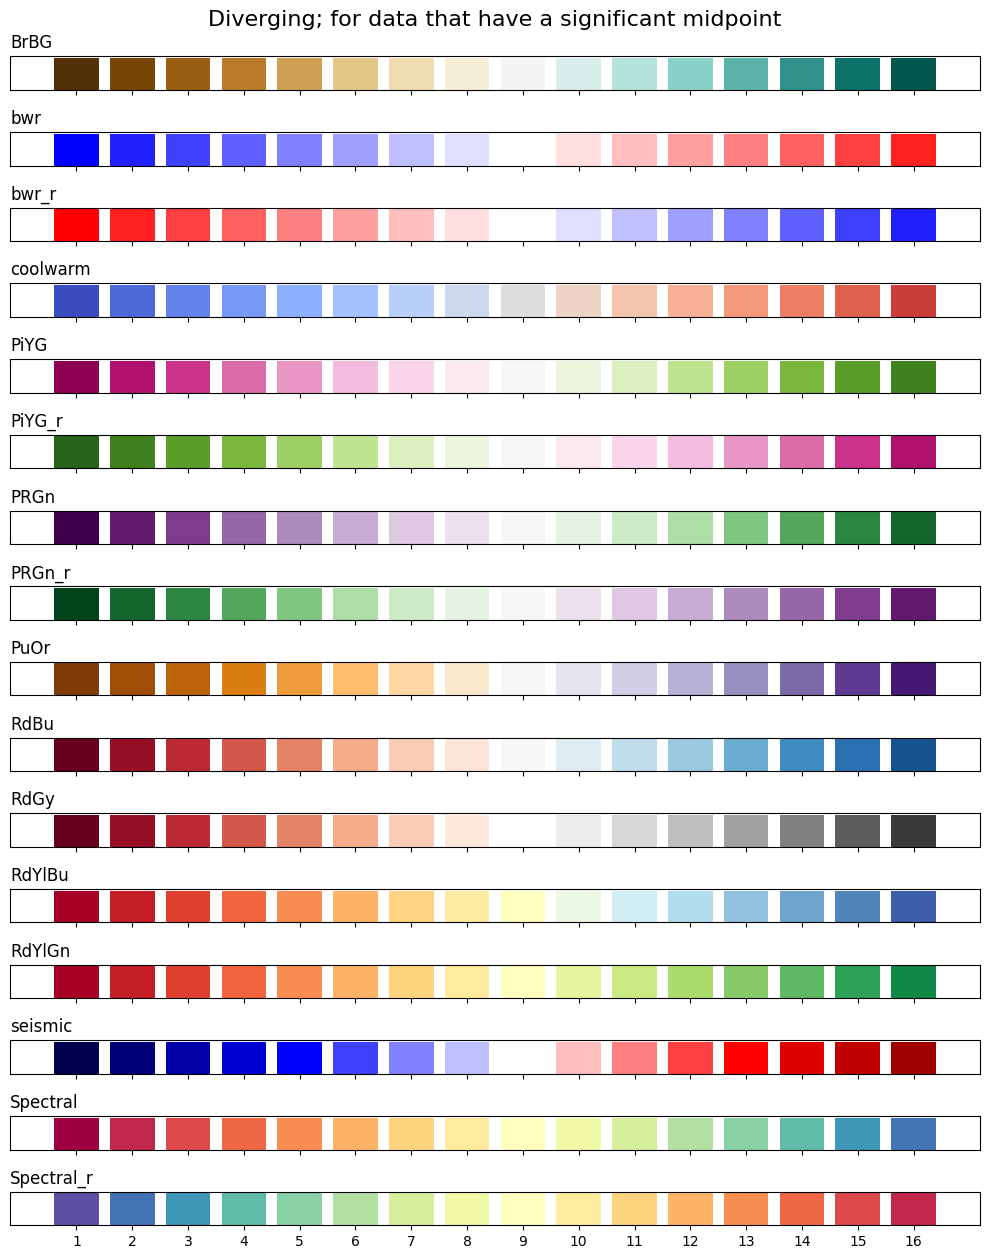

<Figure size 640x480 with 0 Axes>

In [9]:
# TO-DO, a try/except para prevenir nombres de paletas no válidos
#    - Además, adicionar un p_g_key ('sample') para que presente una muestra de maso tres o cuatro paletas de cada grupo


def show_palettes(palette_group_key: str='Qualitatives', n_items: int=15) -> plt.Figure:
    
    # Verified palette_group parameter
    palette_group_key = palette_group_key.strip().capitalize()
    if palette_group_key not in ['Qualitatives', 'Sequential', 'Diverging', 'Cyclic', 'Mix']:
        raise ValueError(f"'palette_group' parameter not valid. Only valid 'Qualitatives', 'Sequential', 'Diverging', 'Cyclic', 'Mix'. Got '{palette_group_key}'.")
    
    # Verified n_times parameter
    if n_items < 1 or n_items > 25:
        raise ValueError(f"'n_items' parameter not valid. Must be > 1 and < 26. Got '{n_items}'.")
    n_items = int(n_items) + 1

    # Create a sample series with n_items
    sr = to_series({str(i): 1 for i in range(1, n_items)})

    # Palette Group lists
    Qualitatives = ['Accent', 'colorblind', 'Dark2', 'Dark2_r', 'flag', 'Paired', 'Pastel1', 'Pastel2',
                    'prism', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']

    Sequential = ['autumn', 'binary', 'Blues', 'brg', 'BuPu', 'cividis', 'cool', 'GnBu',
              'Greens', 'Greys', 'Greys_r', 'gnuplot', 'inferno', 'magma', 'ocean', 'Oranges',
              'OrRd', 'plasma', 'PuRd', 'Purples', 'Reds', 'terrain', 'viridis', 'Wistia']

    Diverging = ['BrBG', 'bwr', 'bwr_r', 'coolwarm', 'PiYG', 'PiYG_r', 'PRGn', 'PRGn_r',
                 'PuOr', 'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'seismic', 'Spectral', 'Spectral_r']

    Cyclic = ['berlin', 'berlin_r', 'cubehelix', 'cubehelix_r', 'flag_r', 'gist_rainbow', 'hsv', 'managua',
              'nipy_spectral', 'rainbow', 'rainbow_r', 'twilight', 'twilight_shifted', 'turbo', 'vanimo']

    # Get the palette group based on the input string (the one selected by the user)
    palette_group_dic = {
        'Qualitatives': (Qualitatives, 'for categorical data'),
        'Sequential': (Sequential, 'for data that has an order'),
        'Diverging': (Diverging, 'for data that have a significant midpoint'),
        'Cyclic': (Cyclic, 'for data that repeats, such as angles or phases'),
    }

    defaults_for_sample = ('Sample', 'of Matplotlib palettes')
    palette_group = palette_group_dic.get(palette_group_key, defaults_for_sample)[0]         # Get the list of palettes for the selected group
    palette_group_desc = palette_group_dic.get(palette_group_key, defaults_for_sample)[1]    # Get the description for the selected group

    fig, axs = plt.subplots(len(palette_group), 1, figsize=(10, len(palette_group)/1.25), tight_layout=True, sharex=True)
    fig.suptitle(f"{palette_group_key}; {palette_group_desc}", fontsize=16, fontweight='medium')
                                                 
    for ax, pltt in zip(axs, palette_group):
        try:
            color_list = get_colors_list(pltt, n_items=n_items)
            ax.bar(sr.index, sr, color=color_list)
            ax.set_title(pltt, loc='left', fontsize=12, fontweight='medium')
            ax.set_yticks([])
        except ValueError:
            pltt = f"'{pltt}' is not currently a valid Matplotlib palette (cmap)"
        finally:
            ax.set_title(pltt, loc='left', fontsize=12, fontweight='medium')
            ax.set_yticks([])                                                   # Hide y-ticks for cleaner look

    plt.show()
    return plt.gcf()  # Return the current figure for further manipulation if needed


fig = show_palettes(n_items=16, palette_group_key='Diverging')

In [10]:
n_items = 24
sr = to_series({str(i): 1 for i in range(n_items)})
# sr

In [11]:
Quali = ['tab10', 'tab20', 'Set1', 'Set2', 'Set3', 'Pastel1', 'Pastel2', 'Dark2', 'Paired', 'Accent']
# pltts_w_colors = {pltt: get_colors_list(pltt, n_items=len(sr)) for pltt in Quali}
# color_lists = [get_colors_list(pltt, n_items=len(sr)) for pltt in Quali]
# nums = [i for i in range(len(Quali))]
Sequen = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds']
color_lists = [get_colors_list(pltt, n_items=len(sr)) for pltt in Sequen]

# palette_group = {'Quali': Quali, 'Sequen': Sequen, 'Diverg': Diverg, 'Cyclic': Cyclic, 'Mix': Mix}

# for ix, pltt, colors in enumerate(zip(Quali, color_lists)): # ValueError: not enough values to unpack (expected 3, got 2)
#     print(f"{ix} - {pltt}: {colors}")  # Display each palette and its corresponding colors

# for ix, pltt, colors in zip(nums, Quali, color_lists):
#     print(f"{ix} - {pltt}: {colors}")  # Display each palette and its corresponding colors

# for k,v in color_lists.items():
#     print(f"{k}: {v}")  # Display each palette and its corresponding colors

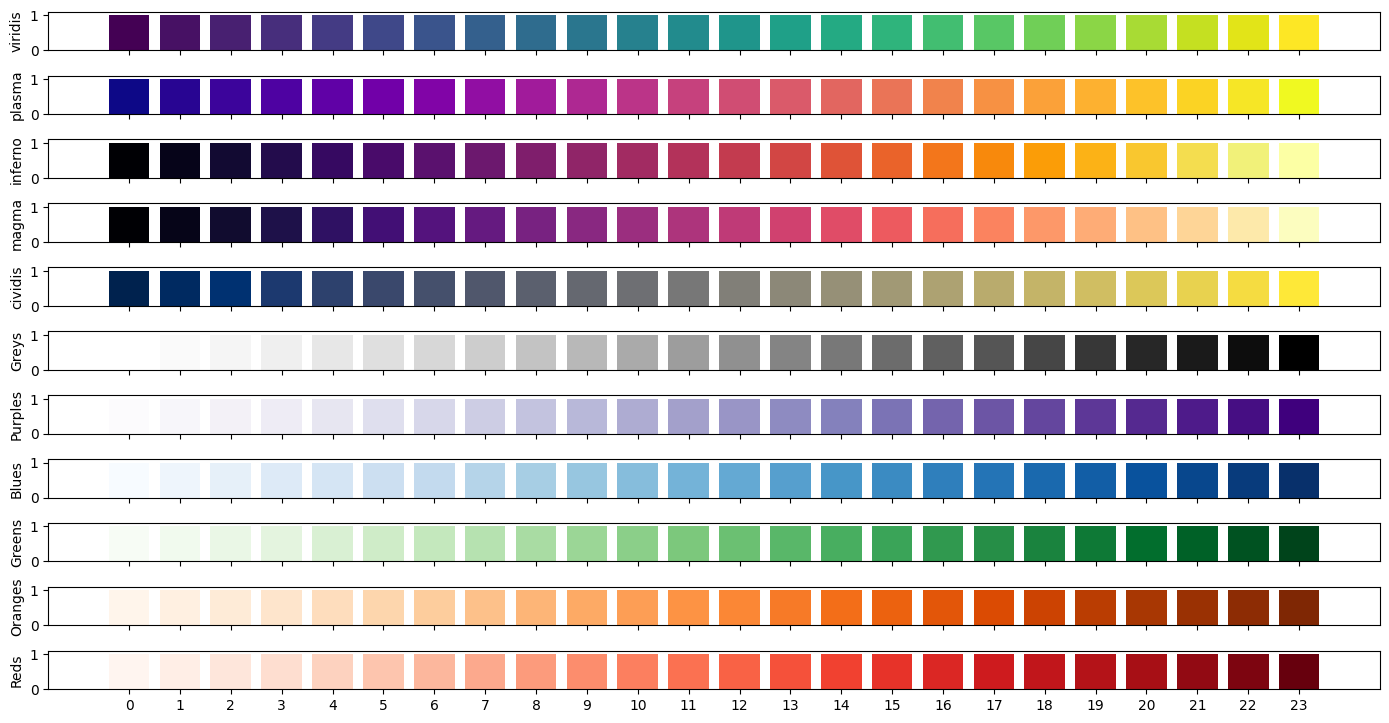

In [12]:


fig, axs = plt.subplots(len(Sequen), 1, figsize=(14, len(Sequen)/1.5), tight_layout=True, sharex=True)

for ax, pltt, colors in zip(axs, Sequen, color_lists):
# for ax, color in zip(axs, colors):
    ax.bar(sr.index, sr, color=colors)                              #, alpha=0.7)
    ax.set_ylabel(pltt)
    # ax.set_title(f'Bar Plot with {color[0]} Color Palette')
    # ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylim(0, sr.max() * 1.1)  # Set y-limits for better visibility

# for ax in axs:
#     ax.set_xticks(range(len(sr.index)))
#     ax.set_xticklabels(sr.index, rotation=45, ha='right')
#     ax.grid(axis='y', linestyle='--', alpha=0.7)
#     ax.set_ylim(0, sr.max() * 1.1)  # Set y-limits for better visibility
#     ax.set_title('Bar Plot of Series Values')
#     ax.bar(sr.index, sr, color='lightgray', alpha=0.5)  # Base bar for reference

# axs[0].bar(sr.index, sr, color=c1)
# axs[0].set_ylabel('viridis')
# axs[1].bar(sr.index, sr, color=c2)
# axs[1].set_ylabel('colorblind')
# axs[2].bar(sr.index, sr, color=c3)
# axs[2].set_ylabel('plasma')
# axs[3].bar(sr.index, sr, color=c4)
# axs[3].set_ylabel('Accent')

# plt.show()

In [13]:
def show_palettes(palette_group: str='Quali', n_items: int=15) -> plt.Figure:

    # Verified palette_group parameter
    if palette_group not in ['Quali', 'Sequen', 'Diverg', 'Cyclic', 'Mix']:
        raise ValueError(f"'palette_group' parameter not valid. Only valid 'Quali', 'Sequen', 'Diverg', 'Cyclic', 'Mix'. Got '{palette_group}'.")
    
    # Verified n_times parameter
    if n_items < 1 or n_items > 25:
        raise ValueError(f"'n_items' parameter not valid. Must be > 1 and < 26. Got '{palette_group}'.")
    n_items = int(n_items)

    # Palette Group lists
    Quali = ['tab10', 'tab20', 'Set1', 'Set2', 'Set3', 'Pastel1', 'Pastel2', 'Dark2', 'Paired', 'Accent']
    Sequen = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds']
    Diverg = ['coolwarm', 'bwr', 'seismic', 'PiYG', 'PRGn', 'BrBG', 'RdGy', 'RdBu', 'Spectral', 'RdYlGn', 'PuOr', 'RdYlBu']
    Cyclic = ['twilight', 'twilight_shifted', 'hsv', 'turbo', 'cubehelix', 'gist_rainbow', 'jet', 'nipy_spectral', 'rainbow_r']
    Mix = ['rainbow', 'flag', 'prism', 'ocean', 'terrain', 'gnuplot', 'CMRmap', 'hot', 'afmhot', 'gist_heat', 'copper', 'bone', 'pink']

    sr = to_series({str(i): 1 for i in range(n_items)})

    for ptte in eval(palette_group):
        colors = get_colors_list(ptte)
        fig, ax = plt.subplots(figsize=(12, 1))
        ax.bar(sr.index, sr, color=colors)
        ax.set_ylabel(ptte)
        plt.show()

In [14]:
show_palette_group('Mix', n_items=9)

NameError: name 'show_palette_group' is not defined

In [ ]:
# Basic chart to show colors
def palette(sr, palette: str, n_items=20):

    cmap = plt.get_cmap(palette, n_items)
    colors = [cmap(i) for i in range(n_items)]
    # colors = plt.get_cmap(palette).colors[:n_items]

    fig, ax = plt.subplots(figsize=(12, 1))
    ax.bar(sr.index, sr, color=colors)
    ax.set_ylabel(palette)

    return fig, ax

# import matplotlib.colors as mcolors
# def palette2(sr, palette: str, n_items=20):

#     cmap = plt.get_cmap(palette)
#     norm = mcolors.Normalize(vmin=sr.min(), vmax=sr.max())
#     colors = cmap(norm(sr))

#     fig, ax = plt.subplots(figsize=(12, 1))
#     ax.bar(sr.index, sr, color=colors)
#     ax.set_ylabel(f"2-{palette}")

#     return fig, ax

Quali = ['tab10', 'tab20', 'Set1', 'Set2', 'Set3', 'Pastel1', 'Pastel2', 'Dark2', 'Paired', 'Accent']
Sequen = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds']
Diverg = ['coolwarm', 'bwr', 'seismic', 'PiYG', 'PRGn', 'BrBG', 'RdGy', 'RdBu', 'Spectral', 'RdYlGn', 'PuOr', 'RdYlBu']
Cyclic = ['twilight', 'twilight_shifted', 'hsv', 'turbo', 'cubehelix', 'gist_rainbow', 'jet', 'nipy_spectral', 'rainbow_r']
Mix = ['rainbow', 'flag', 'prism', 'ocean', 'terrain', 'gnuplot', 'CMRmap', 'hot', 'afmhot', 'gist_heat', 'copper', 'bone', 'pink']

# for ptte in Qualitatives + Sequential + Diverging:
for ptte in Mix:
    fig = palette(sr=sr, palette=ptte, n_items=len(sr))

# for series in (sr, s2):
#     fig = palette(sr=series, palette='tab10', n_items=len(sr))
#     fig = palette2(sr=series, palette='tab10', n_items=len(sr))

In [ ]:
|

In [ ]:
# Reutilizamos los datos secuenciales para mostrar el efecto
datos_secuenciales = np.random.rand(10, 10) * 100

plt.figure(figsize=(7, 6))
plt.imshow(datos_secuenciales, cmap='rainbow')
plt.colorbar(label='Valor')
plt.title('Uso de Paleta Miscelánea ("rainbow") - Usar con cautela')
plt.show()

In [ ]:
# Datos que representan un ciclo (como ángulos de 0 a 2*pi)
angulos = np.linspace(0, 2 * np.pi, 100)
x = np.cos(angulos)
y = np.sin(angulos)
colores_ciclicos = angulos

plt.figure(figsize=(7, 6))
plt.scatter(x, y, c=colores_ciclicos, cmap='twilight', s=100)
plt.title('Uso de Paleta Cíclica ("twilight")')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
# Datos 2D con valores positivos y negativos (centro en 0)
datos_divergentes = np.random.randn(10, 10)

plt.figure(figsize=(7, 6))
# El parámetro 'vmin' y 'vmax' ayuda a centrar la paleta
plt.imshow(datos_divergentes, cmap='coolwarm', vmin=-3, vmax=3)
plt.colorbar(label='Desviación desde el centro')
plt.title('Uso de Paleta Divergente ("coolwarm")')
plt.show()

In [ ]:
# Datos 2D que van de bajo a alto
datos_secuenciales = np.random.rand(10, 10) * 100

plt.figure(figsize=(7, 6))
plt.imshow(datos_secuenciales, cmap='viridis')
plt.colorbar(label='Intensidad')
plt.title('Uso de Paleta Secuencial ("viridis")')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos para 5 categorías distintas
categorias = ['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E']
valores = [28, 55, 43, 61, 34]

# Obtenemos 5 colores distintos de la paleta 'tab10'
colores = plt.get_cmap('tab10').colors

plt.figure(figsize=(8, 5))
plt.bar(categorias, valores, color=colores[:len(categorias)])
plt.title('Uso de Paleta Cualitativa ("tab10")')
plt.ylabel('Cantidad')
plt.show()

In [ ]:

cmap = plt.get_cmap('inferno',  20)
colors = [cmap(i) for i in range(10)]
print(colors)
cmap

In [ ]:
import matplotlib.colors as mcolors

# 1. Datos de ejemplo
labels = ['A', 'B', 'C', 'D', 'E']
alturas = np.array([15, 30, 22, 45, 10])

# 2. Obtener la paleta (colormap) que queremos usar
cmap = plt.get_cmap('viridis')

# 3. Normalizar las alturas de las barras al rango 0-1
# Esto es crucial para que la paleta sepa qué color asignar a cada valor.
norm = mcolors.Normalize(vmin=alturas.min(), vmax=alturas.max())

# 4. Generar la lista de colores
# La paleta (cmap) es una función que, al recibir los valores normalizados,
# devuelve el color RGBA correspondiente a cada uno.
colores = cmap(norm(alturas))

# 5. Crear el gráfico y pasar la lista de colores
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, alturas, color=colores)

ax.set_title('Gráfico de Barras con Paleta "viridis"')
ax.set_ylabel('Altura')
plt.show()

In [ ]:
# Datos de ejemplo
datos_matriz = np.random.rand(10, 10)

plt.figure(figsize=(8, 6))
plt.imshow(datos_matriz, cmap='inferno')
plt.colorbar(label='Intensidad')
plt.title('Mapa de Calor con la Paleta "inferno"')
plt.show()

In [ ]:
# Datos de ejemplo
x = np.random.rand(100)
y = np.random.rand(100)
colores = np.random.rand(100)  # Variable para el color
tamaños = 1000 * np.random.rand(100)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=colores, s=tamaños, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Valor de la Variable de Color')
plt.title('Gráfico de Dispersión con la Paleta "viridis"')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))

# First subplot
ax1.plot([1, 2, 3], [4, 5, 6], color='red')
ax1.set_title('First Plot')

# Second subplot
ax2.bar([1, 2, 3], [3, 2, 1], color='green')
ax2.set_title('Second Plot')

plt.tight_layout()
plt.show()